In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("data/train.csv", index_col=0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [40]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [41]:
# Get some info on the dataset distribution
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [43]:
# Balance the training set
majority_class = df[df['Survived'] == 0]
minority_class = df[df['Survived'] == 1]

# Oversample the minority class
minority_class_0_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=52)

# Concatenate oversampled minority classes with majority class
df_balanced = pd.concat([majority_class, minority_class_0_oversampled])

# Shuffle the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.head()
df_balanced['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [44]:
# There are some NaN values for  the Age variable, replace them by the mean Age
df_balanced['Age']= df_balanced['Age'].fillna(df_balanced['Age'].mean())
df_balanced.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Staneff, Mr. Ivan",male,28.326291,0,0,349208,7.8958,NaN,S
1,1,1,"Taylor, Mr. Elmer Zebley",male,48.000000,1,0,19996,52.0000,C126,S
2,0,3,"Shorney, Mr. Charles Joseph",male,28.326291,0,0,374910,8.0500,NaN,S
3,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,NaN,C
4,1,1,"Hays, Miss. Margaret Bechstein",female,24.000000,0,0,11767,83.1583,C54,C
5,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.000000,0,0,244310,13.0000,NaN,S
6,1,1,"Greenfield, Mr. William Bertram",male,23.000000,0,1,PC 17759,63.3583,D10 D12,C
7,0,3,"Christmann, Mr. Emil",male,29.000000,0,0,343276,8.0500,NaN,S
8,0,3,"Calic, Mr. Jovo",male,17.000000,0,0,315093,8.6625,NaN,S
9,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [45]:
# Get rid of the unused variables
df_balanced = df_balanced.drop('Name', axis=1)
df_balanced = df_balanced.drop('Cabin', axis=1)
df_balanced = df_balanced.drop('Ticket', axis=1)
df_balanced = df_balanced.drop('Embarked', axis=1)

In [46]:
# Transform some dataframe variables into categorical variables
df_balanced['Pclass'] = df_balanced['Pclass'].astype('category')

# Get dummies from all the categorical variables
df_dummies = pd.get_dummies(df_balanced)

In [47]:
# Drop the Sex_female variable as it carries the same information as Sex_male
df_dummies = df_dummies.drop('Sex_female', axis=1)

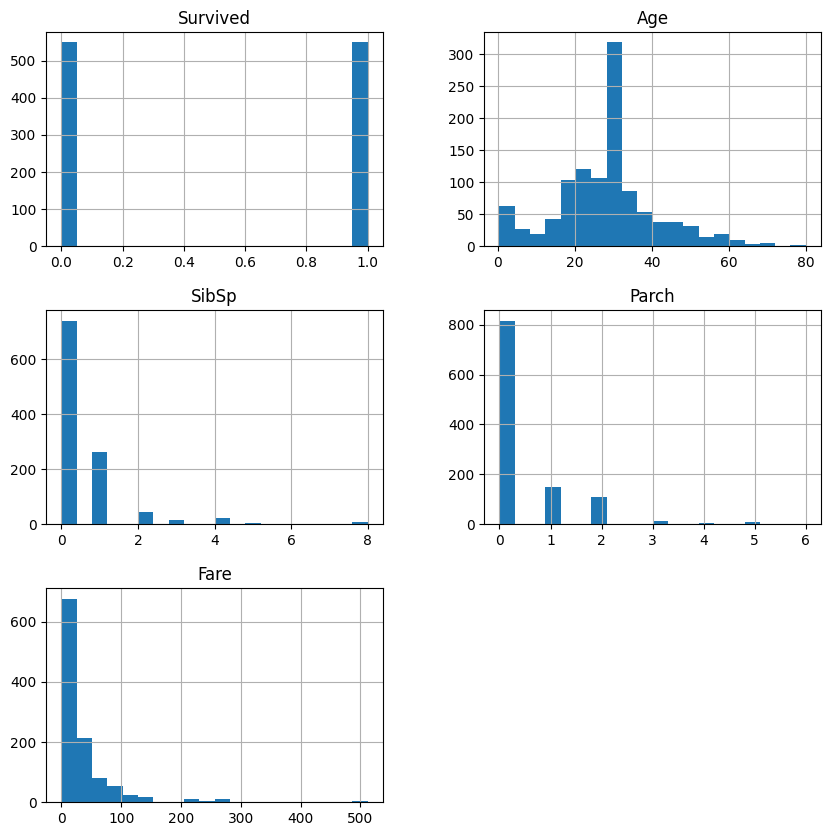

In [48]:
df_dummies.hist(bins=20, figsize=(10, 10))
plt.show()

<Axes: >

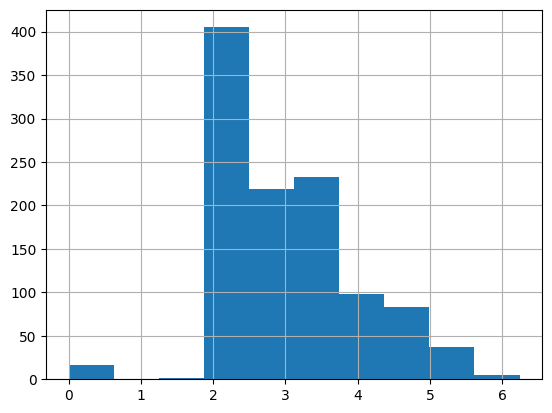

In [49]:
# log norm of fare (used)
df_dummies['norm_fare'] = np.log(df_dummies.Fare+1)
df_dummies['norm_fare'].hist()

In [50]:
df_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,norm_fare
0,0,28.326291,0,0,7.8958,False,False,True,True,2.185579
1,1,48.000000,1,0,52.0000,True,False,False,True,3.970292
2,0,28.326291,0,0,8.0500,False,False,True,True,2.202765
3,1,1.000000,0,2,15.7417,False,False,True,False,2.817903
4,1,24.000000,0,0,83.1583,True,False,False,False,4.432700


<Axes: >

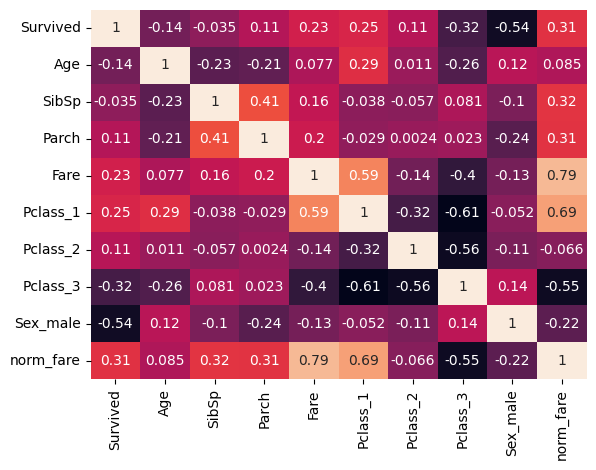

In [51]:
sns.heatmap(df_dummies.corr(), annot=True, cbar=False)

In [52]:
Y = df_dummies['Survived']
X = df_dummies.drop('Survived', axis=1)
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1098 non-null   float64
 1   SibSp      1098 non-null   int64  
 2   Parch      1098 non-null   int64  
 3   Fare       1098 non-null   float64
 4   Pclass_1   1098 non-null   bool   
 5   Pclass_2   1098 non-null   bool   
 6   Pclass_3   1098 non-null   bool   
 7   Sex_male   1098 non-null   bool   
 8   norm_fare  1098 non-null   float64
dtypes: bool(4), float64(3), int64(2)
memory usage: 47.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1098 entries, 0 to 1097
Series name: Survived
Non-Null Count  Dtype
--------------  -----
1098 non-null   int64
dtypes: int64(1)
memory usage: 8.7 KB


In [53]:
X_train, X_internal_eval, Y_train, Y_internal_eval = train_test_split(X, Y, test_size=0.20, random_state=42)

model = XGBClassifier()

model.fit(X_train, Y_train)

Y_internal_eval_pred = model.predict(X_internal_eval)

unique_labels, counts = np.unique(Y_internal_eval_pred, return_counts=True)

# Display the amount of each label predicted
for label, count in zip(unique_labels, counts):
    print(f'Label {label}: {count} occurrences')

Label 0: 109 occurrences
Label 1: 111 occurrences


In [54]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=43)

# Hyperparameter grid to explore
# The gird has been changed several times to find the value for each hyperparameters
param_grids = [{
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1]},
    {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4]},
    {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]},
    {
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 1]
    }
]

for grid in param_grids:
    model = XGBClassifier()

    grid_search = GridSearchCV(model, grid, scoring='accuracy', cv=kf, verbose=1)

    grid_search.fit(X_train, Y_train)

    # Display the best hyperparameters found
    print("Meilleurs hyperparamètres :", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_internal_eval_pred = best_model.predict(X_internal_eval)

# Compute the accuracy when using the best hyperparameters
accuracy_internal = accuracy_score(Y_internal_eval, Y_internal_eval_pred)
print(f'Accuracy (Internal Evaluation): {accuracy_internal}')



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres : {'learning_rate': 0.05, 'n_estimators': 1000}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs hyperparamètres : {'gamma': 0, 'max_depth': 7, 'min_child_weight': 3}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs hyperparamètres : {'colsample_bytree': 0.6, 'subsample': 0.8}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs hyperparamètres : {'alpha': 0, 'lambda': 2}
Accuracy (Internal Evaluation): 0.8818181818181818


In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# Define the hyperparameters found previously
best_hyperparameters = {
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 7,
    'min_child_weight': 3,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'lambda': 2,
    'alpha': 0
}
model = XGBClassifier(**best_hyperparameters)

k = 5

# Initialize the k-fold cross validation
kf = KFold(n_splits=k, shuffle=True, random_state=39)

# Do the cross validation to make sure that our model and the hyperparameters works for different validation sets
scores = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')

# Display the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the average accuracy
print(f'Average accuracy: {scores.mean()}')

Fold 1: Accuracy = 0.8909090909090909
Fold 2: Accuracy = 0.8409090909090909
Fold 3: Accuracy = 0.8272727272727273
Fold 4: Accuracy = 0.8767123287671232
Fold 5: Accuracy = 0.8447488584474886
Average accuracy: 0.8561104192611042


# Inference on the evaluation dataset

In [57]:
X_eval = pd.read_csv("data/test.csv", index_col=0)

X_eval.isnull().sum()

X_eval = X_eval.drop('Name', axis=1)
X_eval = X_eval.drop('Cabin', axis=1)
X_eval = X_eval.drop('Ticket', axis=1)

X_eval['Pclass'] = X_eval['Pclass'].astype('category')
X_eval = pd.get_dummies(X_eval)
X_eval = X_eval.drop('Sex_female', axis=1)
X_eval.info()
X_eval.describe()

X_eval = X_eval.reindex(columns=X.columns, fill_value=0)

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Pclass_1    418 non-null    bool   
 5   Pclass_2    418 non-null    bool   
 6   Pclass_3    418 non-null    bool   
 7   Sex_male    418 non-null    bool   
 8   Embarked_C  418 non-null    bool   
 9   Embarked_Q  418 non-null    bool   
 10  Embarked_S  418 non-null    bool   
dtypes: bool(7), float64(2), int64(2)
memory usage: 19.2 KB


In [58]:
print("Colonnes de l'ensemble d'évaluation:", X_eval.columns)
print("Colonnes de l'ensemble d'entraînement:", df_dummies.columns)

Colonnes de l'ensemble d'évaluation: Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'norm_fare'],
      dtype='object')
Colonnes de l'ensemble d'entraînement: Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'norm_fare'],
      dtype='object')


In [59]:
model = XGBClassifier(**best_hyperparameters)
model.fit(X, Y)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=2,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000, ...)

In [60]:
predictions = model.predict(X_eval)

passenger_ids = X_eval.index
output = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save to CSV
output_file_path = "predictions.csv"
output.to_csv(output_file_path, index=False)